# DS105-04-13 - Lesson 4 Hands-On - Analyzing Sales - in Python

---
## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

___
## Load Data

In [2]:
avocados = pd.read_csv('./assets/avocados.csv')

In [3]:
avocados.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


___
## Question Setup
**Does the total volume of avocados sold differ between `Indianapolis`, `Orlando`, and `PhoenixTucson`?**

In [4]:
# What are the unique entries in `region`?
avocados.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

___
## Data Wrangling

### Subsetting needed variables
Keep the variables needed: `Gr2de` and `Video views`.

In [5]:
regions = ['Indianapolis','Orlando','PhoenixTucson']

In [6]:
avocados1 = avocados["region"].isin(regions)

In [7]:
avocados2 = avocados[avocados1].copy()

In [8]:
avocados2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
988,0,12/27/2015,1.04,123096.09,4647.28,69384.73,11206.40,37857.68,20644.64,11524.06,5688.98,conventional,2015,Indianapolis
989,1,12/20/2015,1.10,116353.68,3702.20,67983.94,9327.71,35339.83,18144.63,12133.67,5061.53,conventional,2015,Indianapolis
990,2,12/13/2015,1.03,125342.89,4904.51,69984.32,11398.44,39055.62,21259.82,15580.08,2215.72,conventional,2015,Indianapolis
991,3,12/6/2015,0.92,145740.44,4067.00,89452.99,13570.12,38650.33,19365.92,17733.68,1550.73,conventional,2015,Indianapolis
992,4,11/29/2015,1.08,108444.41,3079.44,65254.08,10854.59,29256.30,17455.74,9975.21,1825.35,conventional,2015,Indianapolis


### Recode `region` is an integer
The categorical variable must be in an integer format.

In [9]:
# Check current format
avocados2.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
dict = {'Indianapolis' : 0, 'Orlando' : 1, 'PhoenixTucson' : 2}

In [11]:
avocados2['regionR'] = avocados2.region.replace(dict)

In [12]:
avocados2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,regionR
988,0,12/27/2015,1.04,123096.09,4647.28,69384.73,11206.40,37857.68,20644.64,11524.06,5688.98,conventional,2015,Indianapolis,0
989,1,12/20/2015,1.10,116353.68,3702.20,67983.94,9327.71,35339.83,18144.63,12133.67,5061.53,conventional,2015,Indianapolis,0
990,2,12/13/2015,1.03,125342.89,4904.51,69984.32,11398.44,39055.62,21259.82,15580.08,2215.72,conventional,2015,Indianapolis,0
991,3,12/6/2015,0.92,145740.44,4067.00,89452.99,13570.12,38650.33,19365.92,17733.68,1550.73,conventional,2015,Indianapolis,0
992,4,11/29/2015,1.08,108444.41,3079.44,65254.08,10854.59,29256.30,17455.74,9975.21,1825.35,conventional,2015,Indianapolis,0


In [13]:
avocados2.regionR.value_counts()

0    338
1    338
2    338
Name: regionR, dtype: int64

___
## Test Assumptions

Before you go any further, it's important to test for assumptions. If the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results.

### Assumption: Normality
You only need to test for the normality of the dependent variable, since the IV is categorical.

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

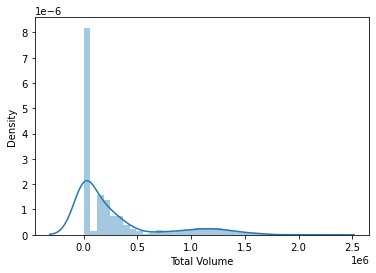

In [14]:
sns.distplot(avocados2['Total Volume'])

<div class="alert alert-block alert-danger">
Fails normal distribution; Positively skewed. Applying Square Root Transformation.
</div>

#### Transformation: Square Root

In [15]:
avocados2['TotalVolumeSQRT'] = np.sqrt(avocados2['Total Volume'])

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeSQRT', ylabel='Density'>

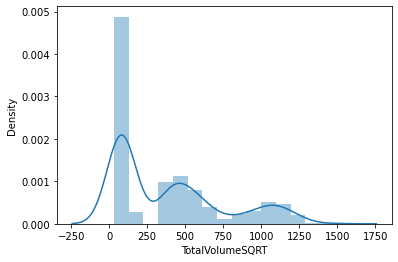

In [16]:
sns.distplot(avocados2['TotalVolumeSQRT'])

<div class="alert alert-block alert-warning">
Looks more normal, but will proceed to LOG transformation to be sure. 
</div>

### Transformation: LOG

In [17]:
avocados2['TotalVolumeLOG'] = np.log(avocados2['Total Volume'])

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeLOG', ylabel='Density'>

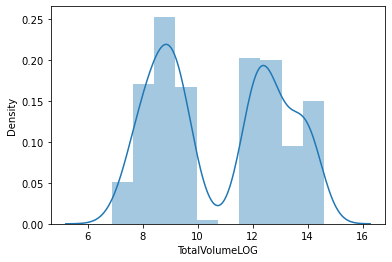

In [18]:
sns.distplot(avocados2['TotalVolumeLOG'])

<div class="alert alert-block alert-success">
Better, maybe? More parabolic... not quite normal...</div>

### Assumption: Homogeneity of Variance
Using `Bartlett's test` since the data is now transformed close to normal distributed.Homogeneity of Variance is met if `p > .05` - *not significant*.

#### Bartlett's Test
To do Bartlett's test, use the function `scipy.stats.bartlett()`, with the argument of the `y data`, followed by the `x data`.

In [19]:
scipy.stats.bartlett(avocados2['TotalVolumeLOG'], avocados2['regionR'])

BartlettResult(statistic=883.7919675933716, pvalue=3.275576009474301e-194)

<div class="alert alert-block alert-danger">
Fails assumption of Homogeneity of Variance.<br>
<i>p < .05</i>, which means that the data fails the assumption of Homogeneity of Variance.</div>

### Assumption: Sample Size
*An ANOVA requires a sample size of at least 20 per independent variable.*<br>
Number of independent variables: 1<br>Required number of cases: 20

Number of cases: 1014

In [20]:
avocados2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 988 to 18008
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1014 non-null   int64  
 1   Date             1014 non-null   object 
 2   AveragePrice     1014 non-null   float64
 3   Total Volume     1014 non-null   float64
 4   4046             1014 non-null   float64
 5   4225             1014 non-null   float64
 6   4770             1014 non-null   float64
 7   Total Bags       1014 non-null   float64
 8   Small Bags       1014 non-null   float64
 9   Large Bags       1014 non-null   float64
 10  XLarge Bags      1014 non-null   float64
 11  type             1014 non-null   object 
 12  year             1014 non-null   int64  
 13  region           1014 non-null   object 
 14  regionR          1014 non-null   int64  
 15  TotalVolumeSQRT  1014 non-null   float64
 16  TotalVolumeLOG   1014 non-null   float64
dtypes: float64(

### Assumption: Independence
There is no statistical test for the assumption of independence, so you can proceed!

---
## Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)
In this case, your data did not meet this assumption, but for the purposes of learning, you'll be shown what to do if you had:

In [21]:
stats.f_oneway(avocados['Total Volume'][avocados['region']=='Indianapolis'],
               avocados['Total Volume'][avocados['region']=='Orlando'],
               avocados['Total Volume'][avocados['region']=='PhoenixTucson'])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

<div class="alert alert-block alert-warning">
<b><i>p < .05</i></b>, which means there is a significant difference in <code>Total Volume</code> between <code>regions</code>.</div>

___
## Post Hocs
Run post-hocs to figure out what groups significantly differed from each other. In Python, the only automatically coding for post-hocs that is available is the Tukey post hoc.

### Computing Post Hocs with Tukey's

In [22]:
postHoc = MultiComparison(avocados2['TotalVolumeLOG'], avocados2['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0253 0.0424  0.816   True
     0      2   1.4766    0.0 1.0898 1.8634   True
     1      2   1.0474    0.0 0.6606 1.4342   True
--------------------------------------------------


This output provides the mean difference in variables, plus the confidence interval (`lower` and `upper` columns), and whether or not you can reject the null hypothesis.

<b>If the value in the `reject` column is `True`, then this means there was a significant difference in the means between those groups.</b>

___
## Determine Means and Draw Conclusions
Examine the means to determine what the difference is between variables.

In [23]:
# isolate only the columns needed
avocados3 = avocados2[['region', 'Total Volume']]

In [24]:
avocados3.groupby('region').mean()

,Total Volume
region,
Indianapolis,89536.661036
Orlando,173552.378373
PhoenixTucson,578826.368343


<div class="alert alert-block alert-info">
<h1>Conclusion:</h1><br>
The total volume of avocado sales between the 3 regions is significantly different, with PhoenixTucson having the highest total volume, and Indianapolis having the lowest total volume among the three.
</div>